In [282]:
# 필요 데이터 불러오기 및 출력하기
# 전체로 보기 위해서 print 사용
import pandas as pd

co2 = pd.read_csv('result/CO2.csv')
no = pd.read_csv('result/NO.csv')
ch4 = pd.read_csv('result/CH4.csv')
temperature = pd.read_csv('result/surface-temper.csv')

print(co2)
print(no)
print(ch4)
print(temperature)

       Year           CO2
0    1750.0  9.350528e+06
1    1751.0  9.350528e+06
2    1752.0  9.354192e+06
3    1753.0  9.354192e+06
4    1754.0  9.357856e+06
..      ...           ...
267  2017.0  3.592574e+10
268  2018.0  3.664614e+10
269  2019.0  3.670250e+10
270  2020.0  3.480726e+10
271  2021.0  3.226598e+10

[272 rows x 2 columns]
      Year            NO
0   1990.0  2.368970e+09
1   1991.0  2.356090e+09
2   1992.0  2.348920e+09
3   1993.0  2.332620e+09
4   1994.0  2.424100e+09
5   1995.0  2.479910e+09
6   1996.0  2.493520e+09
7   1997.0  2.480570e+09
8   1998.0  2.510940e+09
9   1999.0  2.498220e+09
10  2000.0  2.490420e+09
11  2001.0  2.512180e+09
12  2002.0  2.570020e+09
13  2003.0  2.604750e+09
14  2004.0  2.687850e+09
15  2005.0  2.701330e+09
16  2006.0  2.733120e+09
17  2007.0  2.802950e+09
18  2008.0  2.775360e+09
19  2009.0  2.769550e+09
20  2010.0  2.845370e+09
21  2011.0  2.914600e+09
22  2012.0  2.937790e+09
23  2013.0  2.918250e+09
24  2014.0  2.963010e+09
25  2015.0  2.

In [283]:
# 평활화는 우리가 사용할 data가 아니니 제외시키기
temperature.drop(columns=['lowess'], inplace=True)
temperature

,Year,temperature
0,1880,-0.17
1,1881,-0.09
2,1882,-0.11
3,1883,-0.18
4,1884,-0.28
...,...,...
137,2017,0.92
138,2018,0.85
139,2019,0.98
140,2020,1.02


In [284]:
# 연도 통일해서 맞추고 index도 맞춰주기
temperature_result = temperature.loc[temperature.Year>=1990, :]
temperature_result.reset_index(drop=True, inplace=True)
print(temperature_result)

co2_result = co2.loc[co2.Year >= 1990, :]
co2_result.reset_index(drop=True, inplace=True)
print(co2_result)

    Year  temperature
0   1990         0.45
1   1991         0.40
2   1992         0.22
3   1993         0.23
4   1994         0.32
5   1995         0.45
6   1996         0.33
7   1997         0.46
8   1998         0.61
9   1999         0.38
10  2000         0.39
11  2001         0.53
12  2002         0.63
13  2003         0.62
14  2004         0.53
15  2005         0.67
16  2006         0.63
17  2007         0.66
18  2008         0.54
19  2009         0.65
20  2010         0.72
21  2011         0.61
22  2012         0.65
23  2013         0.67
24  2014         0.74
25  2015         0.89
26  2016         1.01
27  2017         0.92
28  2018         0.85
29  2019         0.98
30  2020         1.02
31  2021         0.84
      Year           CO2
0   1990.0  2.274957e+10
1   1991.0  2.323810e+10
2   1992.0  2.256962e+10
3   1993.0  2.280350e+10
4   1994.0  2.296458e+10
5   1995.0  2.345394e+10
6   1996.0  2.415496e+10
7   1997.0  2.430055e+10
8   1998.0  2.420627e+10
9   1999.0  2.451896e+10

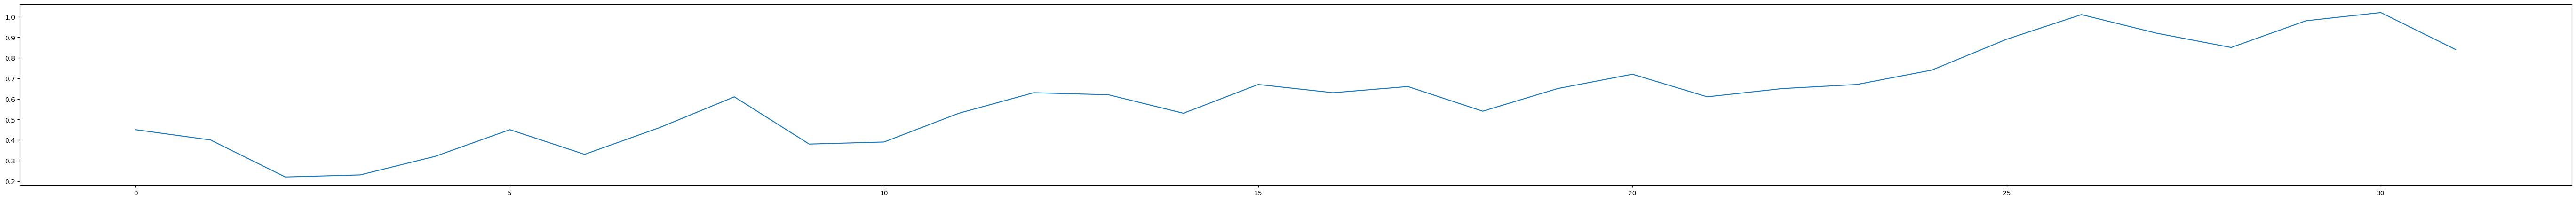

    Year  temperature
0   1990         0.45
1   1991         0.40
2   1992         0.22
3   1993         0.23
4   1994         0.32
5   1995         0.45
6   1996         0.33
7   1997         0.46
8   1998         0.61
9   1999         0.38
10  2000         0.39
11  2001         0.53
12  2002         0.63
13  2003         0.62
14  2004         0.53
15  2005         0.67
16  2006         0.63
17  2007         0.66
18  2008         0.54
19  2009         0.65
20  2010         0.72
21  2011         0.61
22  2012         0.65
23  2013         0.67
24  2014         0.74
25  2015         0.89
26  2016         1.01
27  2017         0.92
28  2018         0.85
29  2019         0.98
30  2020         1.02
31  2021         0.84


In [285]:
# 종속 변수인 온도 데이터 어떻게 생겼는지 시각화로 확인하기
import matplotlib.pyplot as plt

plt.figure(figsize = (70, 5))
temperature_result['temperature'].plot()
plt.show()

print(temperature_result)

In [286]:
# co2, ch4, 데이터 연도 기준으로 합치기
data = pd.merge(co2_result, no, on='Year')
data = pd.merge(data, ch4, on='Year')
print(data)
# data.to_csv('airpolution_data.csv', index=False)


      Year           CO2            NO           CH4
0   1990.0  2.274957e+10  2.368970e+09  6.909030e+09
1   1991.0  2.323810e+10  2.356090e+09  6.918610e+09
2   1992.0  2.256962e+10  2.348920e+09  6.895230e+09
3   1993.0  2.280350e+10  2.332620e+09  6.914180e+09
4   1994.0  2.296458e+10  2.424100e+09  6.958840e+09
5   1995.0  2.345394e+10  2.479910e+09  7.032090e+09
6   1996.0  2.415496e+10  2.493520e+09  7.037110e+09
7   1997.0  2.430055e+10  2.480570e+09  7.268600e+09
8   1998.0  2.420627e+10  2.510940e+09  7.159870e+09
9   1999.0  2.451896e+10  2.498220e+09  7.112040e+09
10  2000.0  2.523421e+10  2.490420e+09  7.124000e+09
11  2001.0  2.545105e+10  2.512180e+09  7.062720e+09
12  2002.0  2.603919e+10  2.570020e+09  7.199600e+09
13  2003.0  2.736672e+10  2.604750e+09  7.262510e+09
14  2004.0  2.862753e+10  2.687850e+09  7.505180e+09
15  2005.0  2.960278e+10  2.701330e+09  7.556280e+09
16  2006.0  3.058353e+10  2.733120e+09  7.749950e+09
17  2007.0  3.149374e+10  2.802950e+09  7.7299

In [287]:
# 마지막으로 종속 변수인 temperature_result 합치기
data = pd.merge(data, temperature_result, on='Year')
data.drop(31, inplace=True)
print(data)

      Year           CO2            NO           CH4  temperature
0   1990.0  2.274957e+10  2.368970e+09  6.909030e+09         0.45
1   1991.0  2.323810e+10  2.356090e+09  6.918610e+09         0.40
2   1992.0  2.256962e+10  2.348920e+09  6.895230e+09         0.22
3   1993.0  2.280350e+10  2.332620e+09  6.914180e+09         0.23
4   1994.0  2.296458e+10  2.424100e+09  6.958840e+09         0.32
5   1995.0  2.345394e+10  2.479910e+09  7.032090e+09         0.45
6   1996.0  2.415496e+10  2.493520e+09  7.037110e+09         0.33
7   1997.0  2.430055e+10  2.480570e+09  7.268600e+09         0.46
8   1998.0  2.420627e+10  2.510940e+09  7.159870e+09         0.61
9   1999.0  2.451896e+10  2.498220e+09  7.112040e+09         0.38
10  2000.0  2.523421e+10  2.490420e+09  7.124000e+09         0.39
11  2001.0  2.545105e+10  2.512180e+09  7.062720e+09         0.53
12  2002.0  2.603919e+10  2.570020e+09  7.199600e+09         0.63
13  2003.0  2.736672e+10  2.604750e+09  7.262510e+09         0.62
14  2004.0

In [288]:
# 독립변수, 종속변수 데이터 넣어주기
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression


x = data[['CH4', 'NO', 'CO2']]
print(data['temperature'])
y = data['temperature'].values
print(x, y)

0     0.45
1     0.40
2     0.22
3     0.23
4     0.32
5     0.45
6     0.33
7     0.46
8     0.61
9     0.38
10    0.39
11    0.53
12    0.63
13    0.62
14    0.53
15    0.67
16    0.63
17    0.66
18    0.54
19    0.65
20    0.72
21    0.61
22    0.65
23    0.67
24    0.74
25    0.89
26    1.01
27    0.92
28    0.85
29    0.98
30    1.02
Name: temperature, dtype: float64
             CH4            NO           CO2
0   6.909030e+09  2.368970e+09  2.274957e+10
1   6.918610e+09  2.356090e+09  2.323810e+10
2   6.895230e+09  2.348920e+09  2.256962e+10
3   6.914180e+09  2.332620e+09  2.280350e+10
4   6.958840e+09  2.424100e+09  2.296458e+10
5   7.032090e+09  2.479910e+09  2.345394e+10
6   7.037110e+09  2.493520e+09  2.415496e+10
7   7.268600e+09  2.480570e+09  2.430055e+10
8   7.159870e+09  2.510940e+09  2.420627e+10
9   7.112040e+09  2.498220e+09  2.451896e+10
10  7.124000e+09  2.490420e+09  2.523421e+10
11  7.062720e+09  2.512180e+09  2.545105e+10
12  7.199600e+09  2.570020e+09  2.603919

In [289]:
# 선형회귀 만들어 놓기
lr = LinearRegression(fit_intercept = True)
lr.fit(x, y)

print('절편 :', lr.intercept_)
print('회귀 계수 :', lr.coef_)


절편 : -2.4051999321255444
회귀 계수 : [-3.79808083e-11  1.63899655e-09 -3.86854845e-11]


In [322]:
# 다항 비선형 회귀 사용해서 예측하기
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x_poly)

lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
print('intercept:', lin_reg.intercept_)
print('coefficients:', lin_reg.coef_)


X_test = data[['CH4', 'NO', 'CO2']]
x_test_poly = poly_features.fit_transform(X_test)

result = list(lin_reg.predict(x_test_poly))
print(y)
print(result)

[[6.90902979e+09 2.36896997e+09 2.27495744e+10 4.77346926e+19
  1.63672841e+19 1.57177487e+20 5.61201872e+18 5.38930585e+19
  5.17543134e+20]
 [6.91860986e+09 2.35609009e+09 2.32381021e+10 4.78671624e+19
  1.63008681e+19 1.60775363e+20 5.55116050e+18 5.47510621e+19
  5.40009391e+20]
 [6.89522998e+09 2.34891992e+09 2.25696243e+10 4.75441965e+19
  1.61963431e+19 1.55622750e+20 5.51742480e+18 5.30142401e+19
  5.09387940e+20]
 [6.91418018e+09 2.33262012e+09 2.28034953e+10 4.78058875e+19
  1.61281558e+19 1.57667475e+20 5.44111661e+18 5.31918920e+19
  5.19999400e+20]
 [6.95883984e+09 2.42410010e+09 2.29645834e+10 4.84254520e+19
  1.68689243e+19 1.59806858e+20 5.87626128e+18 5.56684488e+19
  5.27372089e+20]
 [7.03208984e+09 2.47990991e+09 2.34539445e+10 4.94502876e+19
  1.74389493e+19 1.64930245e+20 6.14995317e+18 5.81636693e+19
  5.50087510e+20]
 [7.03710986e+09 2.49352002e+09 2.41549612e+10 4.95209152e+19
  1.75471743e+19 1.69981116e+20 6.21764209e+18 6.02308793e+19
  5.83462151e+20]
 [7.26

In [316]:
# MAE를 통해서 ACCURACY가 얼마나 되는 확보하기
mae_sum = 0
for i in range(len(y)):
    mae_sum += abs(y[i] - result[i])
mae = mae_sum / len(y)
print((1 -mae) * 100)

93.75804701204152


In [339]:
# 2050까지의 데이터 들고오기 

co2_2050 = pd.read_csv('2030/co2_2030.csv')
CH4_2050 = pd.read_csv('2030/CH4_2030.csv')
NO_2050 = pd.read_csv('2030/NO_2030.csv')

print(co2_2050, CH4_2050, NO_2050)

# 데이터 통일하기
co2_2050_result = co2_2050.loc[co2_2050.Year >= 1990, :]
co2_2050_result.reset_index(drop=True, inplace=True)
print(co2_2050_result)

data_2050 = pd.merge(co2_2050_result, NO_2050, on='Year')
print(data_2050)

       Year           CO2
0    1750.0  9.350528e+06
1    1751.0  9.350528e+06
2    1752.0  9.354192e+06
3    1753.0  9.354192e+06
4    1754.0  9.357856e+06
..      ...           ...
276  2026.0  3.403402e+10
277  2027.0  3.441352e+10
278  2028.0  3.479498e+10
279  2029.0  3.517841e+10
280  2030.0  3.556382e+10

[281 rows x 2 columns]       Year           CH4
0   1990.0  6.909030e+09
1   1991.0  6.918610e+09
2   1992.0  6.895230e+09
3   1993.0  6.914180e+09
4   1994.0  6.958840e+09
5   1995.0  7.032090e+09
6   1996.0  7.037110e+09
7   1997.0  7.268600e+09
8   1998.0  7.159870e+09
9   1999.0  7.112040e+09
10  2000.0  7.124000e+09
11  2001.0  7.062720e+09
12  2002.0  7.199600e+09
13  2003.0  7.262510e+09
14  2004.0  7.505180e+09
15  2005.0  7.556280e+09
16  2006.0  7.749950e+09
17  2007.0  7.729960e+09
18  2008.0  7.782220e+09
19  2009.0  7.812910e+09
20  2010.0  7.909880e+09
21  2011.0  8.050430e+09
22  2012.0  8.141110e+09
23  2013.0  8.109300e+09
24  2014.0  8.266810e+09
25  2015.0  8.

In [340]:


# co2, ch4, 데이터 연도 기준으로 합치기
print(data_2050)

data_2050 = pd.merge(data_2050, CH4_2050, on='Year')
print(data_2050)
data_2050.loc[len(data_2050)] = [2031.0, 2.274957e+10, 3.403192e+09, 6.909030e+09]
print(data_2050)

# 다항 비선형 회귀 사용해서 예측하기
x_future_data = data_2050[[  'CH4', 'NO', 'CO2']]
x_future_data_poly = poly_features.fit_transform(x_future_data)


result_2050 = list(lin_reg.predict(x_future_data_poly))
print(result_2050)

      Year           CO2            NO
0   1990.0  2.274957e+10  2.368970e+09
1   1991.0  2.323810e+10  2.356090e+09
2   1992.0  2.256962e+10  2.348920e+09
3   1993.0  2.280350e+10  2.332620e+09
4   1994.0  2.296458e+10  2.424100e+09
5   1995.0  2.345394e+10  2.479910e+09
6   1996.0  2.415496e+10  2.493520e+09
7   1997.0  2.430055e+10  2.480570e+09
8   1998.0  2.420627e+10  2.510940e+09
9   1999.0  2.451896e+10  2.498220e+09
10  2000.0  2.523421e+10  2.490420e+09
11  2001.0  2.545105e+10  2.512180e+09
12  2002.0  2.603919e+10  2.570020e+09
13  2003.0  2.736672e+10  2.604750e+09
14  2004.0  2.862753e+10  2.687850e+09
15  2005.0  2.960278e+10  2.701330e+09
16  2006.0  3.058353e+10  2.733120e+09
17  2007.0  3.149374e+10  2.802950e+09
18  2008.0  3.206944e+10  2.775360e+09
19  2009.0  3.160704e+10  2.769550e+09
20  2010.0  3.334330e+10  2.845370e+09
21  2011.0  3.446845e+10  2.914600e+09
22  2012.0  3.497408e+10  2.937790e+09
23  2013.0  3.528303e+10  2.918250e+09
24  2014.0  3.553444e+10 

In [341]:
data_2050['Temperature'] = result_2050

print(data_2050)

      Year           CO2            NO           CH4  Temperature
0   1990.0  2.274957e+10  2.368970e+09  6.909030e+09     0.330848
1   1991.0  2.323810e+10  2.356090e+09  6.918610e+09     0.302282
2   1992.0  2.256962e+10  2.348920e+09  6.895230e+09     0.309842
3   1993.0  2.280350e+10  2.332620e+09  6.914180e+09     0.283761
4   1994.0  2.296458e+10  2.424100e+09  6.958840e+09     0.381903
5   1995.0  2.345394e+10  2.479910e+09  7.032090e+09     0.423975
6   1996.0  2.415496e+10  2.493520e+09  7.037110e+09     0.458257
7   1997.0  2.430055e+10  2.480570e+09  7.268600e+09     0.480315
8   1998.0  2.420627e+10  2.510940e+09  7.159870e+09     0.458622
9   1999.0  2.451896e+10  2.498220e+09  7.112040e+09     0.456950
10  2000.0  2.523421e+10  2.490420e+09  7.124000e+09     0.444982
11  2001.0  2.545105e+10  2.512180e+09  7.062720e+09     0.499163
12  2002.0  2.603919e+10  2.570020e+09  7.199600e+09     0.540457
13  2003.0  2.736672e+10  2.604750e+09  7.262510e+09     0.579201
14  2004.0

<AxesSubplot: >

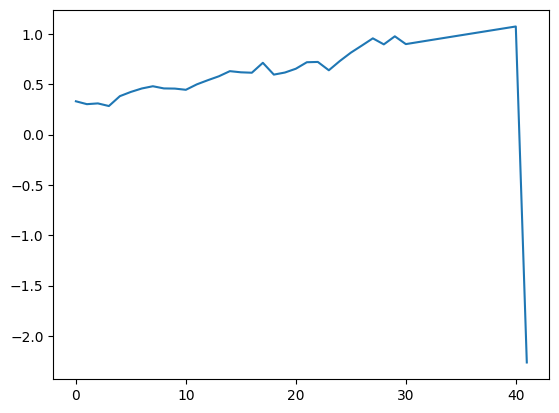

In [342]:
data_2050.loc[:,'Temperature'].plot()

<AxesSubplot: >

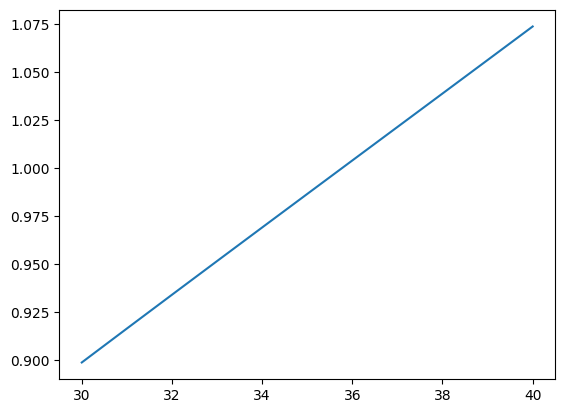

In [321]:
data_2050.loc[30:,'Temperature'].plot()